## Objective:- Group customers into meaningful segments (e.g., high spenders, budget buyers) using K-Means clustering based on purchasing patterns.

In [2]:
#IMPORTING LIBRARIES:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/vedan/OneDrive/Documents/cogenetix/Task4/Mall_Customers.csv")
df = pd.DataFrame(data)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#info checking description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# checking missing value:

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

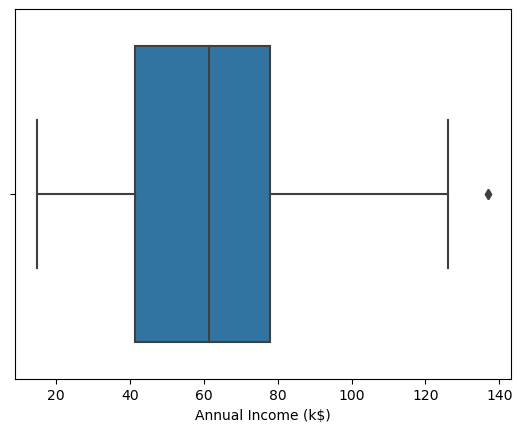

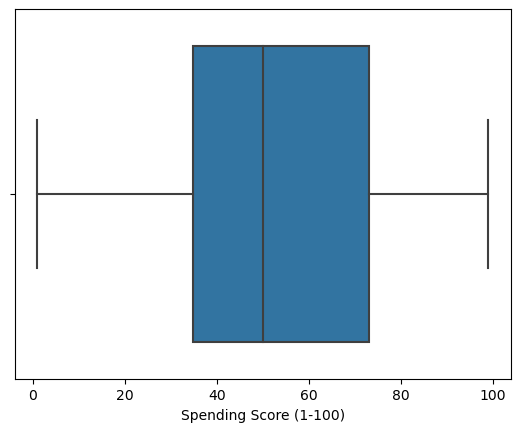

In [11]:
# Outlier handling (Optional but good)
sns.boxplot(x=df["Annual Income (k$)"])
plt.show()

sns.boxplot(x=df["Spending Score (1-100)"])
plt.show()

In [12]:
# Feature Selection 

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [14]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

D:\ANA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

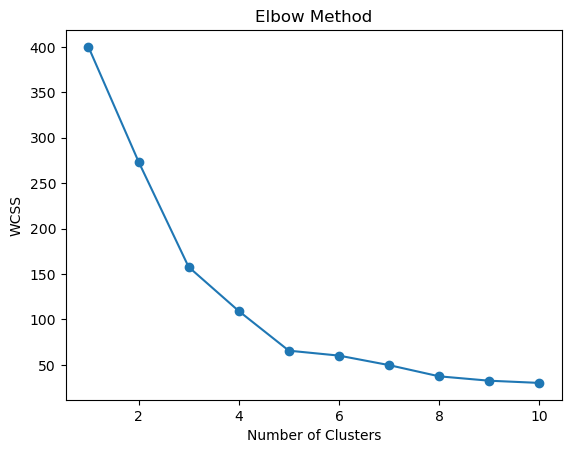

In [15]:
# Find Optimal K (Elbow Method)

from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [24]:
# Silhouette Score (Validation)

from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

ss = silhouette_score(X_scaled, labels)

if ss > 0.5:
    print("Its working good:", ss)
else :
    print("Its not up to mark:", ss)

Its working good: 0.5546571631111091


D:\ANA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
# Apply Final K-Means Model
df["Cluster"] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


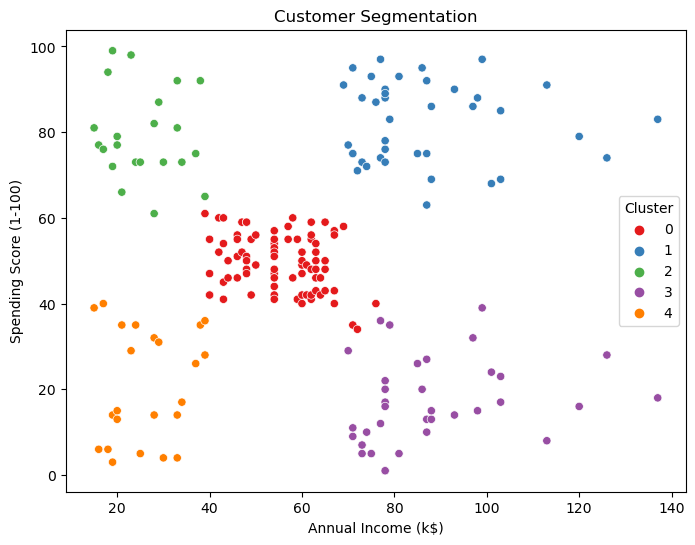

In [26]:
# Cluster Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="Set1"
)
plt.title("Customer Segmentation")
plt.show()

In [27]:
cluster_summary = df.groupby("Cluster")[
    ["Annual Income (k$)", "Spending Score (1-100)"]
].mean()

cluster_summary

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


Cluster 0 → High income, high spending → Premium Customers
Cluster 1 → Low income, high spending → Impulsive Buyers
Cluster 2 → High income, low spending → Careful Rich
Cluster 3 → Low income, low spending → Budget Buyers
Cluster 4 → Average customers

In [29]:
import joblib

# Save scaler
joblib.dump(scaler, "customer_scaler.pkl")

# Save KMeans model
joblib.dump(kmeans, "customer_kmeans_model.pkl")

['customer_kmeans_model.pkl']